## White -box attack

In [4]:
import os

In [3]:
model_path = '/users/Stathis/GoogleDrive/MLP/attack_results_pgd_7/'
nets =  list(os.listdir(model_path))
nets = [a for a in nets if 'json' in a]
nets.sort()

transfer_method= {'nat','pgd','fgsm'}
trained_method= {'nat','pgd','fgsm'}

attack_results = {}

for net in nets:
    model_path = '../experiments_results/attack_results_pgd_7/'+net
    with open(model_path,'r+') as json_data:
#         print(net[24:-5])
        attack_results[net[24:-5]] = list(json.load(json_data).values())
    
df = pd.DataFrame.from_dict(attack_results, columns=['Clean', 'FGSM', 'PGD'], orient='index')

df=df.sort_values('Clean',ascending = False)
df=np.round(df*100,1)

NameError: name 'os' is not defined

In [139]:
df.index

Index(['densenet121_cifar10', 'resnet56_cifar10', 'densenet121_cifar10_fgsm',
       'transfer_resnet56_nat_nat', 'transfer_resnet56_nat_fgsm',
       'transfer_densenet121_nat_nat', 'resnet56_cifar10_fgsm',
       'resnet56_cifar10_pgd', 'densenet121_cifar10_pgd',
       'transfer_resnet56_pgd_nat', 'transfer_resnet56_fgsm_nat',
       'transfer_densenet121_nat_fgsm', 'transfer_resnet56_nat_pgd',
       'transfer_resnet56_fgsm_fgsm', 'transfer_densenet121_fgsm_nat',
       'transfer_resnet56_pgd_pgd', 'transfer_densenet121_fgsm_fgsm',
       'transfer_densenet121_pgd_nat', 'transfer_densenet121_nat_pgd',
       'transfer_densenet121_pgd_pgd', 'densenet121_cifar100',
       'resnet56_cifar100', 'densenet121_cifar100_fgsm',
       'densenet121_cifar100_pgd', 'resnet56_cifar100_fgsm',
       'resnet56_cifar100_pgd'],
      dtype='object')

In [155]:
# nets_to_plot = ['densenet121_cifar10', 'densenet121_cifar10_fgsm', 'densenet121_cifar10_pgd',
#                 'resnet56_cifar10', 'resnet56_cifar10_fgsm', 'resnet56_cifar10_pgd',
#                ]

# nets_to_plot = ['densenet121_cifar100', 'densenet121_cifar100_fgsm', 'densenet121_cifar100_pgd',
#                 'resnet56_cifar100', 'resnet56_cifar100_fgsm', 'resnet56_cifar100_pgd',
#                ]

nets_to_plot = ['transfer_resnet56_nat_fgsm', 'transfer_resnet56_fgsm_fgsm', 'transfer_resnet56_fgsm_nat',
                'transfer_resnet56_nat_pgd', 'transfer_resnet56_pgd_pgd', 'transfer_resnet56_pgd_nat',
                'transfer_densenet121_nat_fgsm', 'transfer_densenet121_fgsm_fgsm', 'transfer_densenet121_fgsm_nat',
                'transfer_densenet121_nat_pgd', 'transfer_densenet121_pgd_pgd', 'transfer_densenet121_pgd_nat',
               ]

In [156]:
df_tmp = df.loc[nets_to_plot]
for i in df_tmp.iterrows():
    print('%s & %.1f%%%% & %.1f%%%% & %.1f%%%% \\\\ ' % 
          (' '.join(i[0].split('_')), i[1]['Clean'], i[1]['FGSM'], i[1]['PGD']))
    
print(df_tmp.to_latex())

transfer resnet56 nat fgsm & 89.8%% & 48.2%% & 7.5%% \\ 
transfer resnet56 fgsm fgsm & 86.4%% & 40.4%% & 13.9%% \\ 
transfer resnet56 fgsm nat & 87.3%% & 38.3%% & 10.9%% \\ 
transfer resnet56 nat pgd & 87.0%% & 52.9%% & 9.4%% \\ 
transfer resnet56 pgd pgd & 86.1%% & 45.0%% & 12.2%% \\ 
transfer resnet56 pgd nat & 87.7%% & 41.5%% & 10.3%% \\ 
transfer densenet121 nat fgsm & 87.1%% & 51.1%% & 7.9%% \\ 
transfer densenet121 fgsm fgsm & 85.9%% & 46.0%% & 12.7%% \\ 
transfer densenet121 fgsm nat & 86.3%% & 40.2%% & 10.5%% \\ 
transfer densenet121 nat pgd & 83.6%% & 52.2%% & 10.6%% \\ 
transfer densenet121 pgd pgd & 82.7%% & 50.3%% & 16.5%% \\ 
transfer densenet121 pgd nat & 85.6%% & 41.1%% & 12.0%% \\ 
\begin{tabular}{lrrr}
\toprule
{} &  Clean &  FGSM &   PGD \\
\midrule
transfer\_resnet56\_nat\_fgsm     &   89.8 &  48.2 &   7.5 \\
transfer\_resnet56\_fgsm\_fgsm    &   86.4 &  40.4 &  13.9 \\
transfer\_resnet56\_fgsm\_nat     &   87.3 &  38.3 &  10.9 \\
transfer\_resnet56\_nat\_pgd      & 

<Figure size 1152x720 with 0 Axes>

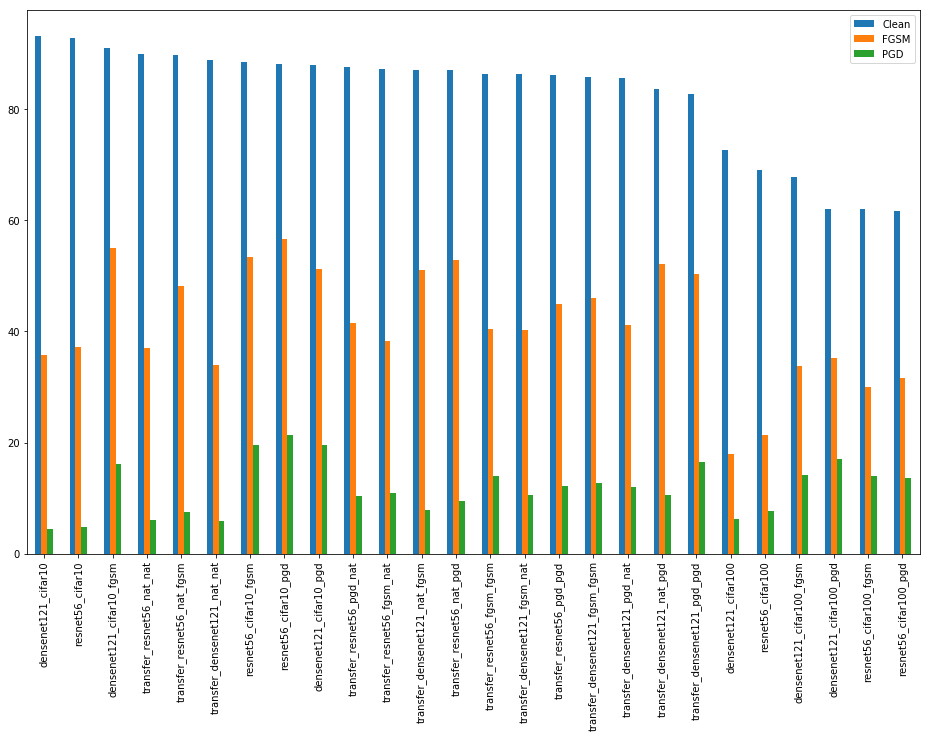

In [136]:
plt.figure(figsize=(16,10))
df.plot(figsize=(16,10), kind='bar')

## Black-box attacks

In [5]:
black_box_path = '../experiments_results/attack_results/black_box_results_e_0125.json'
with open(black_box_path,'r+') as json_data:
    black_box_results = json.load(json_data)

In [6]:
black_box_results['cifar10']

[{'densenet121_cifar10_fgsm_attacked_by_fgsm_acc': 0.7964,
  'resnet56_cifar10_attacked_by_fgsm_acc': 0.5136000000000001,
  'resnet56_cifar10_fgsm_attacked_by_fgsm_acc': 0.7877999999999998,
  'transfer_densenet121_fgsm_fgsm_attacked_by_fgsm_acc': 0.7181000000000001,
  'transfer_densenet121_fgsm_nat_attacked_by_fgsm_acc': 0.6553,
  'transfer_densenet121_nat_fgsm_attacked_by_fgsm_acc': 0.6537999999999998,
  'transfer_resnet56_fgsm_fgsm_attacked_by_fgsm_acc': 0.7586000000000002,
  'transfer_resnet56_fgsm_nat_attacked_by_fgsm_acc': 0.7180000000000001,
  'transfer_resnet56_nat_fgsm_attacked_by_fgsm_acc': 0.6850999999999999}]

In [ ]:
'transfer_resnet56_nat_fgsm_attacked_by_fgsm_acc': 0.6850999999999999
transfer_resnet56_fgsm_fgsm_attacked_by_fgsm_acc': 0.7586000000000002
resnet56_cifar10_fgsm_attacked_by_fgsm_acc'      : 0.7877999999999998
'resnet56_cifar10_attacked_by_fgsm_acc'          : 0.5136000000000001